# Hauptkomponentenanalyse
# (Principal Component Analysis, PCA)
# vs. 
# Denoising Variational Autoencoders

## _Intuition, Beispiele und  Formalismus_

jupyter nbconvert PCAvsDVAEde.ipynb --to slides --post serve

# Eine intuitive Perspektive ...

#### "... realistische, hochdimensionale Daten konzentrieren sich in der Nähe einer nichtlinearen, niedrigdimensionalen Mannigfaltigkeit ..." [Lei et al., 2018]

![](manifold.png)

#### Aber wie lernt man die Mannigfaltigkeit und die Wahrscheinlichkeitsverteilung darauf?

# Eine intuitive Perspektive ...

#### Aber wie lernt man die Mannigfaltigkeit und die Wahrscheinlichkeitsverteilung darauf?
![](manifold-generic.png)

# PCA vs. DVAE an Hand von Beispielen

# PCA vs. DVAE an Hand von Beispielen

Der __MNIST (Modified National Institute of Standards and Technology) Datensatz__ von handgeschriebenen Zahlen besteht aus __60,000 Trainings- und 10,000 Test-Beispielen__. Dieser gehört zu einem größeren Datensatz, der von NIST zur Verfügung gestellt wird. Die Zahlen wurden hinsichtlich Ihrer Größe __normalisiert und in einem Bild fester Größe zentriert__. 

![](mnist.png)

# Vorstellung der Wettbewerber

# PCA 

* __Unüberwachtes__ Lernen
* __Lineare Transformation__
  
![](pca-intuition.png)

# PCA 

![](pca-intuition.png)
* __"Transformiere"__ eine Menge von Beobachtungen in ein __anderes Koordinatensystem__, in dem die Werte der ersten Koordinate (Komponente) die __größtmögliche Varianz__ aufweisen [Friedman et al., 2017]
* Die __resultierenden Koordinaten (Komponenten)__ sind __nicht__ mit den ursprünglichen Koordinaten __korreliert__    

# PCA 

* praktische Berechnung
    * __Eigenwertzerlegung der Kovarianz-Matrix__
    * __Singulärwertzerlegung__ der Beobachtungen
* Wird zur __Dimensions-Reduzierung__ genutzt
* Die __Rekonstruktion der Beobachtungen__("decoding") aus den führenden __Hauptkomponenten__ hat den __niedrigsten quadratischen Fehler__
![](svd-graphic-simple.png)

# Autoencoders

* unüberwachtes __neuronales Netz__
* __minimiert__ den Fehler zwischen Rekonstruktionen und Beobachtungen [Goodfellow et al., 2016]
* lernt die __Identitätsfunktion__
* wird mit Hilfe von __Fehlerrückführung (Backpropagation) trainiert__ und dann aufgetrennt um __Kodierung und Dekodierung__ zu erreichen

# Autoencoders

Das folgende Schaubild zeigt eine typische __Autoencoder Pipeline__ 

![](autoencoder-pipeline.png)

# PCA vs. Autoencoders

*  Ein __Autoencoder__ mit einer einzelnen __voll verbundenen (fully-connected) versteckten Ebene__, einer __linearen Aktivierungsfunktion__ und dem __quadratischen Fehler als Kostenfunktion__ ist __eng mit der PCA verwandt__ - seine __Gewichten__ spannen den __Untervektorraum der Hauptkomponenten__ auf [Plaut, 2018]

* Bei __Autoencodern__ sorgt die __diagonale Approximation beim Kodiervorgang__ zusammen mit der __inhärenten Stochastizität__ für lokale __Orthogonalität beim Dekodieren__

# PCA vs. Autoencoders

* Das Verhalten bei Autoencodersn hinsichtlich __Rekonstruktion und Orthogonalität__ ähnelt stark der __Einbettung__, welche bei der __PCA__ gewählt wird [Rolinek et al, 2019]

* Der Unterschied besteht darin, dass bei der __Ausgabe von Autoencodern__, im Gegensatz zur PCA, die __Koordinaten korreliert__ und __nicht der Größe (im Hinblick auf die Varianz) nach absteigend sortiert sind__

# PCA vs. Autoencoders Implementierung

In [8]:
# import all necessary libs
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import tensorflow as tf
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras import metrics
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2DTranspose,Reshape
from sklearn.decomposition import PCA
import os
%matplotlib inline
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

## Grundlegende Mathematik der PCA

### Lineare Transformation

* Es sei $\{y_i\}^N_{i=1}$ eine Menge von $N$ Beobachtungs-Vektoren der Dimension $n$ mit $n\leq N$.

* Eine __lineare Transformation__ eines __endlich-dimensionalen__ Vektors kann als __Matrix Multiplikation__ ausgedrückt werden: 

$$ \begin{align} x_i = W y_i \end{align} $$  
  
mit $y_i \in R^{n}, x_i \in R^{m}$ und $W \in R^{nxm}$. 

## Grundlegende Mathematik der PCA

### Lineare Transformation

* Das $j-te$ Element in $x_i$ ist das __Innere Produkt__ von $y_i$ und der $j-ten$ Spalte der Matrix $W$, welche wir durch $w_j$ bezeichen. Es sei $Y \in R^{nxN}$ die Matrix, welche wir durch horizontale Aneinanderreihung der Vektoren $\{y_i\}^N_{i=1}$ erhalten, 

$$ Y = \begin{bmatrix} | ... | \\ y_1 ... y_N \\ | ... | \end{bmatrix} $$

* Aus der __linearen Transformation__ folgt:

$$ X = W^TY,  X_0 = W^TY_0, $$

wobei $Y_0$ die __Matrix der zentrierten Elemente__ (d.h. wir subtrahieren den Mittelwert von jeder Beobachtung) bezeichnet.

### Maximale Varianzkomponenten, Kovarianz und Dekorrelation

* Wenn $W^T$ Transformation darstellt, welche die __Hauptkomponentenanalyse__ bezeichnet, so bezeichnen wir $W = P$. Jede Spalte der Matrix $P$, welche durch  $\{p_j\}^n_{j=1}$ bezeichnen, ist ein __Ladungs-Vektor__, wohingegen jeder transformierte Vektor $\{x_i\}^N_{i=1}$ eine __Hauptkomponente__ ist.

### Maximale Varianzkomponenten, Kovarianz und Dekorrelation

* Der erste Ladungs-Vektor ist derjenige Einheitsvektor mit dem das innere Produkt der Beobachtungs-Vektoren die __größte Varianz__ aufweisen:

$$ \max w_1^T Y_0Y_0^Tw_1, w_1^Tw_1 = 1$$

* Die Lösung der vorherigen leichung ist der erste Eigenvektor der __Kovarianz-Matrix__ $Y_0Y_0^T$, welcher zum größten Eigenwert gehört.

* Die Matrix $P$ kann durch __Diagonalisierung der Kovarianz-Matrix__ berechnet werden:

$$ Y_0Y_0^T = P \Lambda P^{-1} = P \Lambda P^T $$

$\Lambda = Y_0Y_0^T $ ist eine Diagonal-Matrix, deren Diagonal-Elemente $\{\lambda_i\}^N_{i=1}$ der Größe nach absteigend sortiert sind. $ Y = PX $ liefert die inverse Tranformation. Da die Kovarianz-Matrix von $X$ diagonal ist, ist die PCA eine __dekorrelierende Transformation__.

### Dimensionsreduzierung, Komprimierung, Skalierung

PCA wird zur __Dimensions-Reduktion__ verwendet, da sie durch die durch eine lineare Transformation die __Anzahl der Variablen reduziert__. Dies wird erreicht, indem man die ersten $m$ Hauptkomponenten $(m < n)$ erhält und die folgende Gleichung anwendet:

$$ X_m = P_m^TY$$

Da nur die ersten $m$ Hauptkomponenten erhalten werden, __verliert__ PCA __information__ (d.h. __verlustreiche Komprimierung__). Der __Verlust__ wird jedoch durch die __Maximierung der Komponenten-Varianzen minimiert__.

### Dimensionsreduzierung, Komprimierung, Skalierung

Zur Berechung der $m$ größten Eigenwerte von $Y_0Y_0^T$ können viele verschiedene __iterative Algorithmen__ eingesetzt werden 
* QR Algorithmen
* Jacobi Algorithmus
* power method
* SVD

Für __sehr große Datenmengen__ eignen sich diese Algorithmen __nicht__!

### Minimaler quadratischer Gesamtrekonstruktionsfehler

Die Transformations-Matrix $P_m$ kann ebenfalls durch Lösung der folgenden Gleichung berechnet werden:

$$ \min_{W \in R^{nxm}} \| Y_0 - WW^TY_0 \|_F^2, W^TW = I_{mxm}$$

wobei $F$ die Frobenius-Norm bezeichnet. 

Daraus folgt, dass $P_m$ __jeden zentrierten Vektor__ der Länge $n$ in einen Vektor der Länge $m$ mit ($ m < n$) derart __komprimiert__, dass die __Summe des quadratischen Rekonstruktions-Fehlers minimiert wird__. 

### Singulärwert-Zerlegung 
### (Singular Value Decomposition, SVD)

Ein Vektor $v$ der Dimension $N$ ist ein __Eigenvektor__ einer quadratischen N × N Matrix $A$, wenn diese die folgende __lineare Gleichung__ erfüllt

$$Av =\lambda v$$

wobei $λ$ ein skalarer Wert ist, welcher als der __zum Eigenvektor v gehörende Eigenwert__ bezeichnet wird.

### Singulärwert-Zerlegung 
### (Singular Value Decomposition, SVD)

Die Matrix $Y_0 \in R^{nxN}$ kann __faktorisert__ werden als $Y_0 = U \Sigma V^T$, wobei $U \in R^{nxn}$ und $V \in R^{NxN}$ __orthogonale Matrizen__ sind und $\Sigma \in R^{nxN}$ abgesehen von der Diagonalwerten (den sogenannten __Singulär-Werten__) nur aus Nullen besteht.

Die Singulärwertzerlegung von $Y_0$ ist äquivalent zur __Eigenwertzerlegung__ von $Y_0T_0^T$. 

![](svd-graphic.png)

In [2]:
# analytical PCA of the training set
def analytical_pca(y):
    # variance to explain
    pca = PCA(0.7)
    # apply PCA
    pca.fit(y)
    # extract the components 
    loadings = pca.components_
    # apply the transformation
    components = pca.transform(y)
    # reconstruct from components for visualization
    filtered = pca.inverse_transform(components)
    return filtered

In [3]:
# training params for PCA vs. DVAE
num_train = 50000
n_images = 6
batch_size = 256
original_dim = 784
latent_dim = 8
epochs = 10
epsilon_std = 1.0
noise_factor = 0.5

In [4]:
# get the MNIST digits
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# prepare data for PCA
shape_x_train = x_train.shape                                                               
pcaInput = np.reshape(x_train,[shape_x_train[0],shape_x_train[1]*shape_x_train[2]]).astype('float32')/255      
# prepare data for DVAE                                      
train_num=50000
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 28,28,1))
x_test = x_test.reshape((len(x_test), 28,28,1))
noise_train = x_train + noise_factor * np.random.randn(*x_train.shape)
noise_test = x_test + noise_factor * np.random.randn(*x_test.shape)
# clip the images to be between 0 and 1
noise_train = np.clip(noise_train, 0., 1.)
noise_test = np.clip(noise_test, 0., 1.)

11493376/11490434 [==============================] - 686s 60us/step


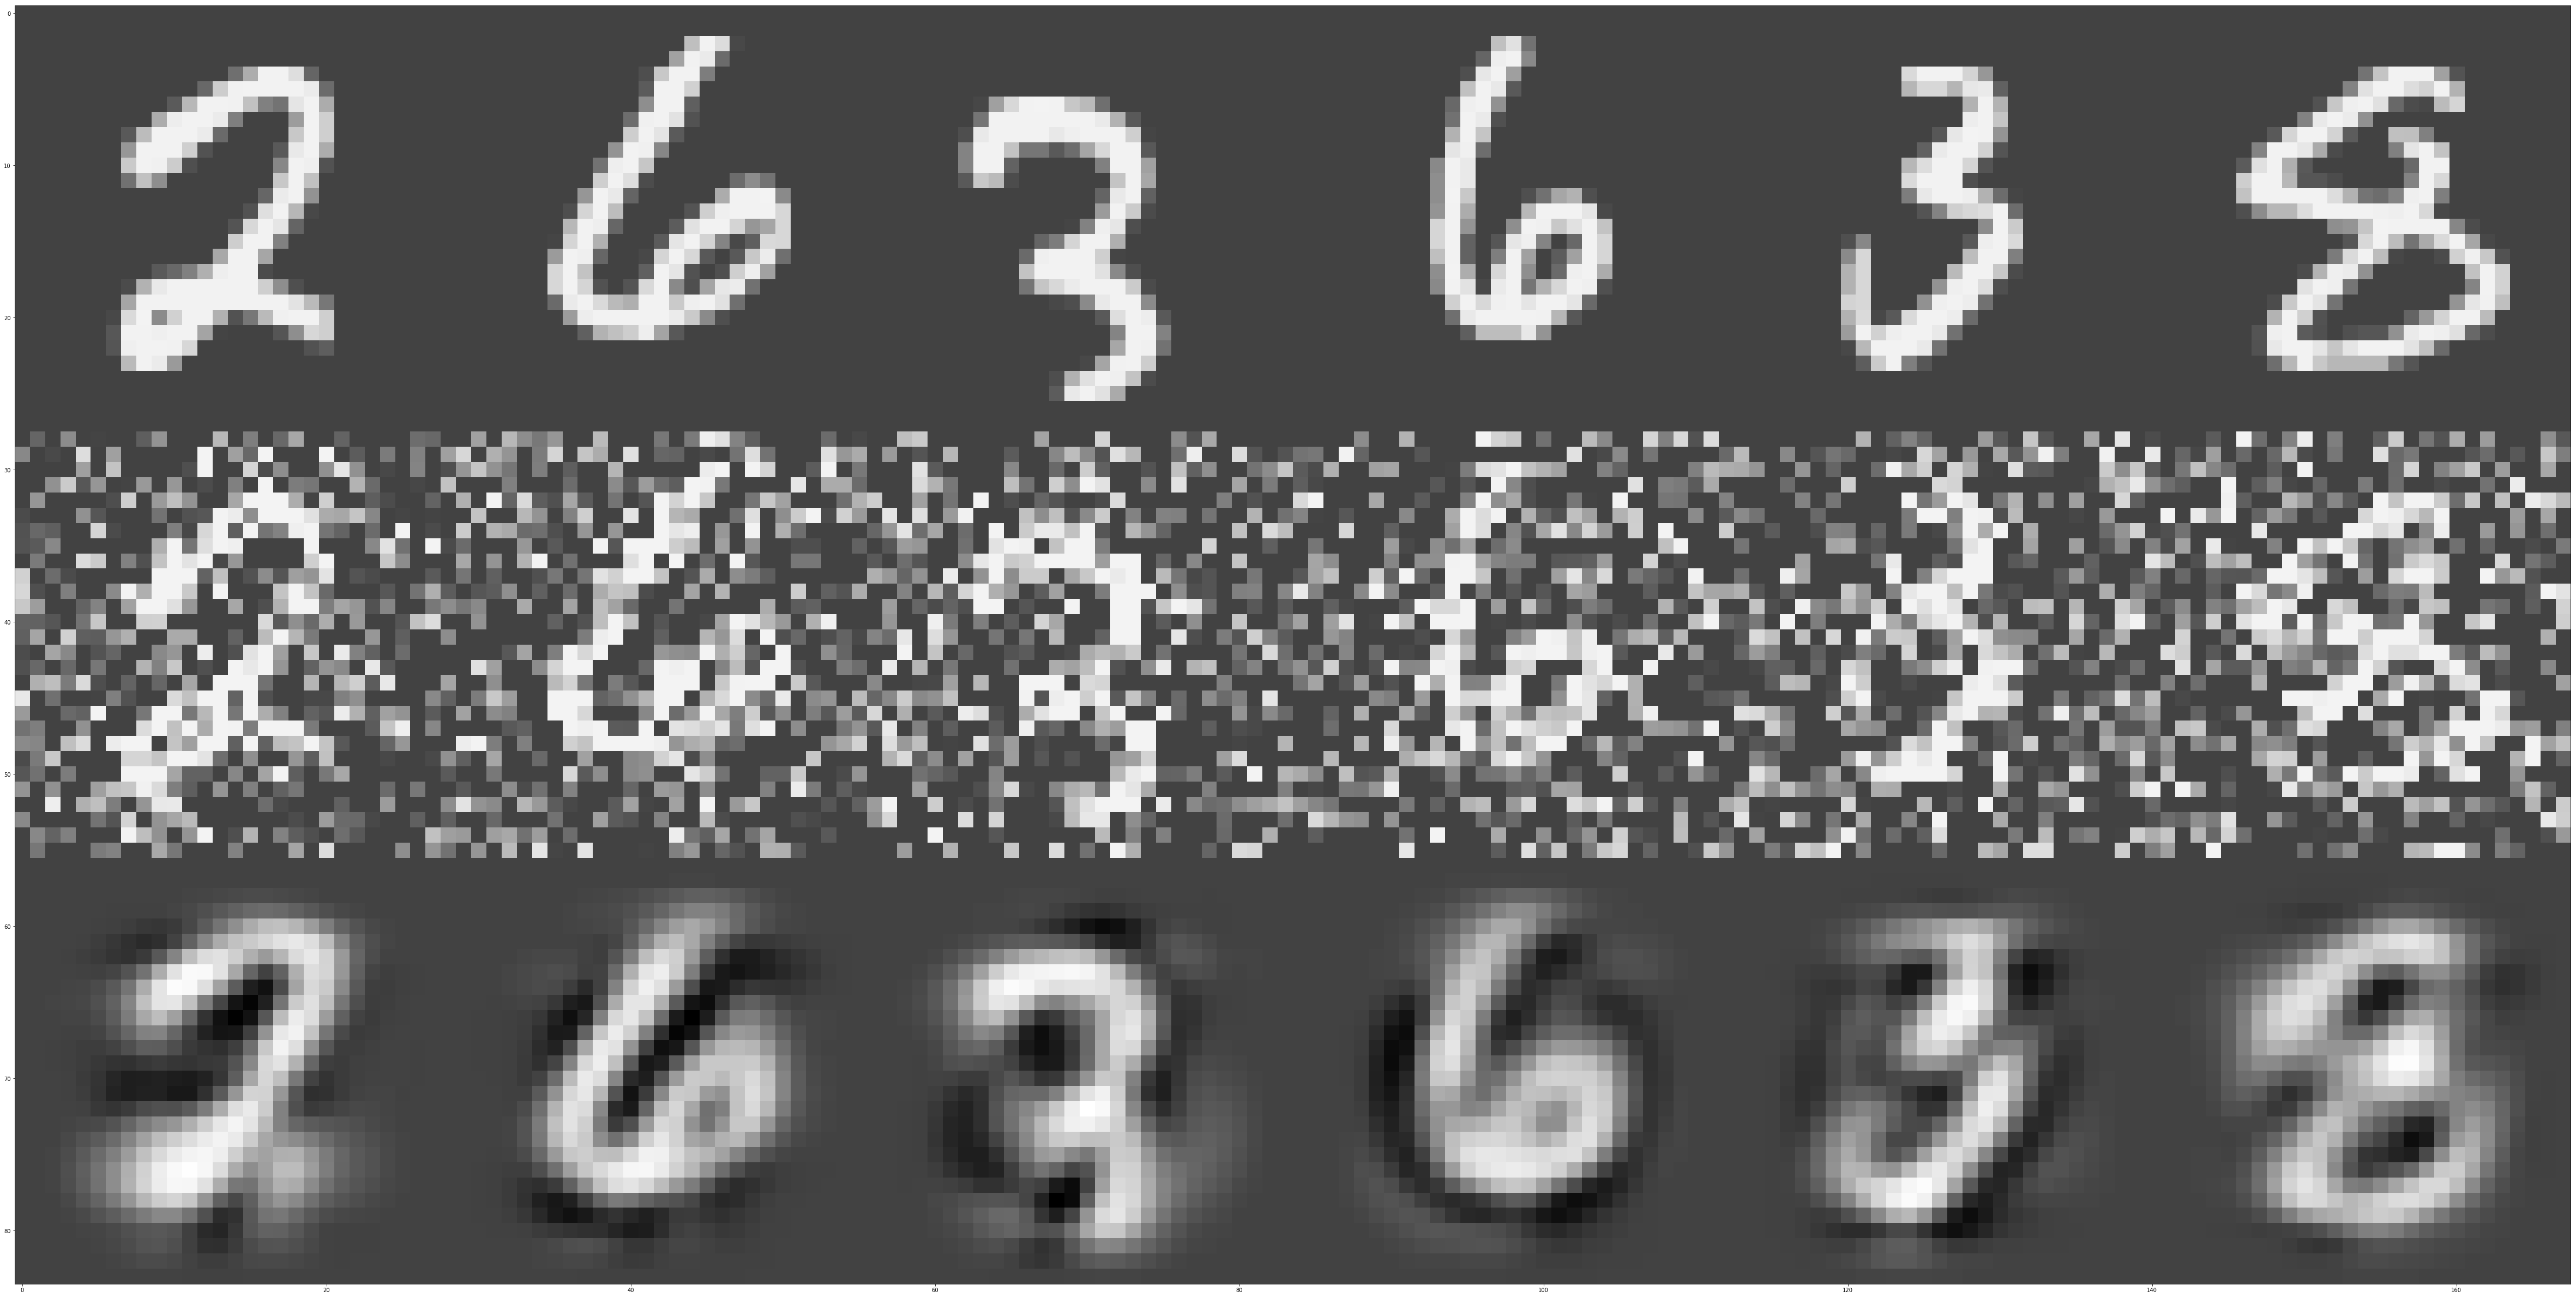

In [7]:
# display
digit_size = 28
figure = np.zeros((digit_size * 3, digit_size * n_images))
showidx=np.random.randint(0,num_train,n_images)
# precalculate PCA
pcaOutput = analytical_pca(pcaInput)
# display input, noisy input and PCA on noisy input
for i,idx in enumerate (showidx):
    figure[0: 28,i *28: (i + 1) * 28] = np.reshape(x_train[idx], [28, 28])
    figure[28: 56,i *28: (i + 1) * 28] = np.reshape(noise_train[idx], [28, 28])
    figure[28 * 2: 28 * 3,i *28: (i + 1) * 28] = np.reshape(pcaOutput[idx], [28, 28])
plt.figure(figsize=(28*3, 28*n_images))
plt.imshow(figure, cmap='Greys_r')
plt.show()

## Grundlegende Mathematik der Autoencoder

Für jeden Eingangsvektor $x$ der Dimension $d$ des kompletten Datensaztes der Länge $n$ generiert das neuronale Netz eine Rekonstruktion $x'$ durch:

* __Kodierung der Eingangsdaten__ (d.h. verwende die lineare / nicht-lineare Transformation $g_\phi(.)$)
* dies liefert eine __verborgende, komprimierte Kodierung__ in der dünnsten Netzwerk-Ebene, $z$
* __Dekodierung der komprimierten Eingangsdaten__ durch Anwendung der linearen / nicht-linearen Transformation $f_\theta(.)$

![](autoencoder.png)

## Grundlegende Mathematik der Autoencoder

Die __Parameter $(\theta, \phi)$ werden im Verlauf des Training derart optimiert__, dass ein den Eingangsdaten möglichst ähnliches Ergebnis , $x \approx f_\theta(g_\phi(x))$, produziert wird. In anderen Worten: __die Indentitäts-Funktion wird erlernt__.

Es gibt viele verschiedene __Metriken um die Ähnlichkeit zwischen Eingangsdaten und Rekonstruktion__ zu quantifizieren. Beispiele sind __Cross-Entropy (bei sigmoid Aktivierungsfuntionen)__ oder der __mittlere quadratische Fehler (MSE)__:

$$ \frac{1}{n} \sum_{i=1}^{n}(x^{i} - f_\theta(g_\phi(x^{i}))^2$$

![](autoencoder.png)

# Denoising Variational Autoencoders (DVAE)

Das Funktionsprinzip __unterscheidet sich__ vom grundlegenden Autoencoder dahingehend, dass ein gewisses Maß an __Störrauschen__  (einer __gewissen Wahrscheinlichkeitsverteilung__ folgend) den __Eingangsdaten hinzugefügt wird__ und dass die __verborgenen Ebenen__ dieses Rauschen ausgleichen muss um die Eingangsdaten zu __rekonstruieren__ [Im, Bengio et al., 2017, Kingma et al., 2017].

![](denoising-variational-autoencoder.png)

# Denoising Variational Autoencoders (DVAE)

Für jeden gestörten Eingangsvektor $\tilde x$ eines originalen Vektors $x$ der Dimension $d$, generiert das neuronale Netz eine Rekonstruktion $x'$ durch:
* __Kodierung der Eingangsdaten__, welche die Abbildung als Wahrscheinlichkeit der Schätzung von $z$ unter Verwendung der Eingangsdaten darstellt
* dies liefert eine __verborgende, komprimierte Kodierung in der dünnsten Netzwerk-Ebene__ $z$, welche der Verteilung $q_\phi(z|x)$ folgt
* __Dekodierung der komprimierten Eingangsdaten__ an der Ausgangsebene unter Einhaltung des __Beobachtungs-Modells__ $p_\theta(x|z)$

![](denoising-variational-autoencoder.png)

In [ ]:
# Implement the DVAE
#encoder part
x_noise = Input(shape=(28,28,1))
conv_1 = Conv2D(64,(3, 3), padding='valid',activation='relu')(x_noise)
conv_2 = Conv2D(64,(3, 3), padding='valid',activation='relu')(conv_1)
pool_1 = MaxPooling2D((2, 2))(conv_2)
conv_3 = Conv2D(32,(3, 3), padding='valid',activation='relu')(pool_1)
pool_2 = MaxPooling2D((2, 2))(conv_3)
h=Flatten()(pool_2)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

In [ ]:
# Implement the DVAE
#reparameterization trick
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0.,
                              stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

In [ ]:
# Implement the DVAE
#decoder part
# we instantiate these layers separately so as to reuse them later
z=Reshape([1,1,latent_dim])(z)
conv_0T = Conv2DTranspose(128,(1, 1), padding='valid',activation='relu')(z)#1*1
conv_1T = Conv2DTranspose(64,(3, 3), padding='valid',activation='relu')(conv_0T)#3*3
conv_2T = Conv2DTranspose(64,(3, 3), padding='valid',activation='relu')(conv_1T)#5*5
conv_3T = Conv2DTranspose(48,(3, 3), strides=(2, 2),padding='same',activation='relu')(conv_2T)#10*10
conv_4T = Conv2DTranspose(48,(3, 3), padding='valid',activation='relu')(conv_3T)#12*12
conv_5T = Conv2DTranspose(32,(3, 3), strides=(2, 2),padding='same',activation='relu')(conv_4T)#24*24
conv_6T = Conv2DTranspose(16,(3, 3), padding='valid',activation='relu')(conv_5T)#26*26
x_out = Conv2DTranspose(1,(3, 3), padding='valid',activation='sigmoid')(conv_6T)#28*28

## Grundlegende Mathematik der DVAE

Die __Verlustfunktion zur Wiederherstellung__ der ursprünglichen Eingangsdaten (__nicht die gestörten__), $\tilde{x}^{i} = M(\tilde{x}^{i} | x^{i}) $.

DVAE __Verlustfunktion__ beinhaltet die Erstellung von Beispielen aus $z \backsim q_\phi(z|x)$. Dies ist ein __stochastischer Prozess__ und eignet sich daher __nicht zur Fehlerrückführung__.

## Grundlegende Mathematik der DVAE

Die __geschätzte Posteriori-Verteilung $q_\phi(z|x)$__ approximiert die tatsächliche Verteilung $p_\theta(z|x)$. Wir können die __Kullback-Leibler Abweichung__ benutzen um die __Differenz der beiden Verteilungen__ zu quantifizieren. Die KL Abweichung __DKL(X∥Y) misst den Informationsverlust__ wenn die Verteilung Y verwendet wird um X darzustellen.


## Grundlegende Mathematik der DVAE

Bei __abweichenden Bayesischen Methoden__ wird die Verlustfunktion auch die abweichende untere Schranke oder auch __evidence lower bound (ELBO)__ genannt. Der “untere Schranke” Teil des Namens rührt daher, dass KL ist nicht-negativ und daher ist der Verlust die untere Schranke von $log p_\theta(x)$.

$$ log p_\theta(x) - D_{KL}(q_\phi(z|x) || p_\theta(z|x)) \leq log p_\theta(x) $$

Durch __Minimierung des Verlusts__, __maximieren__ wir daher die __untere Schranke der Wahrscheinlichkeit__ zur Generierung echter Daten-Beispiele.

In [ ]:
# Implement the DVAE
# instantiate model
dvae = Model(x_noise, x_out)
dvae.summary()

# Compute loss
def VAE_loss(x_origin,x_out):
    x_origin=K.flatten(x_origin)
    x_out=K.flatten(x_out)
    xent_loss = original_dim * metrics.binary_crossentropy(x_origin, x_out)
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    dvae_loss = K.mean(xent_loss + kl_loss)
    return dvae_loss
dvae.compile(optimizer='adam', loss=VAE_loss)

In [ ]:
# Train the DVAE
vae.fit(noise_train,x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(noise_test, x_test))

In [ ]:
# Comparison PCA vs. DVAE
num_test=10000
showidx=np.random.randint(0,num_test,n_images)
x_out=vae.predict(x_test[showidx])
# Display
for i,idx in enumerate (showidx):
    figure[0: 28,i *28: (i + 1) * 28] = np.reshape(x_test[idx], [28, 28])
    figure[28: 28 * 2,i *28: (i + 1) * 28] = np.reshape(noise_test[idx], [28, 28])
    figure[28 * 2: 28 * 3,i *28: (i + 1) * 28] = np.reshape(x_out[i], [28, 28])
    figure[28 * 3: 28 * 4,i *28: (i + 1) * 28] = np.reshape(pcaOutput[idx], [28, 28])

plt.figure(figsize=(28 * 4, 28*n_images))
plt.imshow(figure, cmap='Greys_r')
plt.savefig('result_keras_VAE.png')
plt.show()

In [14]:
%%HTML 
<style>
td {
  font-size: 15px
}
</style>

# Vergleich von PCA und DVAE

### Lernen der Mannigfaltigkeit

|__PCA__|__DVAE__|
|:-----|:---|
| Kodierung/Dekodierung, keine Robustheit gegen Rauschen | nicht-linear, probabilistische Kodierung/Dekodierung mit Robustheit gegen Rauschen und nicht-linearen Aktivierungsfunktionen|
| unkorrelierte Koordinaten | korrelierte Ausgansdaten an der dünnsten Netzwerkebene |
| Koordinaten sind in absteigener Reihenfolge der Varianz geordnet | Koordinaten sind ungeordnet |
| die Spalten der Transformations-Matrix sind orthonormal | die Spalten der Transformations-Matrix sind nicht notwendigerweise orthonormal |
| Robustheit gegenüber moderatem Rauschen mit bekannten Verteilungen | Robustheit gegen eine Vielzahl verschiedener Arten und Größenordnungen an injeziertem Rauschen (masking noise, Gaussian noise, salt-and-pepper noise), da das Entrauschen entscheidung für die Generalisierung ist |
| einfacher Algorithmus (ohne Regularisierung), geringe Robustheit | die Punkte in niedrig-dimensionalen Mannifaltigkeiten sind robust gegen Rauschen im hoch-dimensionalen Beobachtungs-Raum |

# Vergleich zwischen PCA und DVAE

### Training 

|__PCA__|__DVAE__|
|:-----|:---|
| Abbildung der Eingangsdaten auf einen festen Vektor | Abbildung der Eingangsdaten auf eine Wahrscheinlichkeitsverteilung |
| iterative Methoden: QR Zerlegung, Jacobi Algorithmus, Singulärwertzerlegung | Fehlerrückführung (Backpropagation)  |
| aufgrund der Kovarianz-Berechnung ineffizient bei großen Datenmengen | effizient bei großen Datenmengen aufgrund der starken Fähigkeit des Erlernens der Mannigfaltigkeit |
| basiert auf der Korrelations-/Kovarianz-Matrix, welche - zumindest in der Theorie - sehr empfindlich gegenüber Ausreißern sein kann | kann Beispiele direkt aus dem Eingangsraum generieren und daher die Eigenschfaten des Eingangsrauschens beschreiben ("reparametrization trick") |

# Lieraturverzeichnis

[Goodfellow et al., 2016] Ian Goodfellow, Yoshua Bengio and Aaron Courville, Deep Learning, MIT Press, 2016.

[Friedman et al., 2017] Jerome H. Friedman, Robert Tibshirani, and Trevor Hastie, The Elements of Statistical Learning: Data Mining, Inference, and Prediction, Springer, 2017.

[Plaut, 2018] Plaut, E., 2018. From principal subspaces to principal components with linear autoencoders. arXiv preprint arXiv:1804.10253.

[Im, Bengio et al., 2017] Im, D.I.J., Ahn, S., Memisevic, R. and Bengio, Y., 2017, February. Denoising criterion for variational auto-encoding framework. In Thirty-First AAAI Conference on Artificial Intelligence.

[Rolinek et al, 2019] Rolinek, M., Zietlow, D. and Martius, G., 2019. Variational Autoencoders Pursue PCA Directions (by Accident). In Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (pp. 12406-12415).

[Lei et al., 2018] Lei, N., Luo, Z., Yau, S.T. and Gu, D.X., 2018. Geometric understanding of deep learning. arXiv preprint arXiv:1805.10451.

[Kingma et al., 2013] Kingma, D.P. and Welling, M., 2013. Auto-encoding variational bayes. arXiv preprint arXiv:1312.6114.